# Matrices for data scientists

#### Authored by Guillermo Moncecchi

<a href="https://colab.research.google.com/github/gmonce/datascience/blob/master/src/2.%20-%20Matrices%20for%20data%20scientists.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

If you want to to do machine learning, you need to work with matrices with the same fluency you have with numbers.This notebooks aims to review the main properties of matrices, show the intuition behind them, and inspect how to manipulate them using  `numpy` and `scipy` (see [the difference](http://www.scipy.org/scipylib/faq.html#what-is-the-difference-between-numpy-and-scipy)). It is not a numpy/scipy tutorial, but a brief introduction to matrices, showing also how to manipulate them using Python 3.


In [1]:
%matplotlib inline
import numpy as np, scipy as sp, matplotlib.pyplot as plt

### 1. Very basic operations

First, let's create some numpy arrays, the common structure for dealing with n-dimensional matrices. I will mostly work with two-dimensional matrices since are easier to interpret, but most results admints n-dimensional  matrices.

First, let's create a 2D-numpy array, and show that its elements are integers.

In [2]:
# Specify each row of the matrix as a Python list
A=np.array([[0,0,1],[1,1,0],[1,1,1]])
print (A)
print (A.dtype)

print (np.sum(A))
print (np.sum(A,axis=0))
print (np.sum(A,axis=1))

[[0 0 1]
 [1 1 0]
 [1 1 1]]
int64
6
[2 2 2]
[1 2 3]


Create an matrix of 3 rows by 4 columns, filled with zeros and another filled with ones.

In [3]:
print (np.zeros((3,4)))


[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [4]:
print (np.ones((3,4)))

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


1D-arrays in Python are always row vectors, i.e. **vectors are just $1\times n$ matrices**:

In [5]:
print (np.ones(10))
print ("Size:"+ str(np.ones(10).size))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Size:10


**First operation: matrix sum** (both matrices should have the same dimensionns)

In [6]:
A=np.array([0,1,1,0,0,1,1,1,1]).reshape((3,3))
B=np.array([1,1,1,1,0,1,0,1,1]).reshape((3,3))
print (str(A + B))


[[1 2 2]
 [1 0 2]
 [1 2 2]]


If the two matrices have different dimensions, numpy __upcasts__ matrices (adding elements to make both matrices compatibles). In the following example the only row in b is repeated to make b a 2x2 matrix

In [7]:
A=np.array([0,1,2,1]).reshape((2,2))
B=np.array([0,1])

print (A)
print (B)
print (A + B)

[[0 1]
 [2 1]]
[0 1]
[[0 2]
 [2 2]]


**Second operation: multiply a scalar by a matrix**. 

In [8]:
a=8.1
B=np.ones((2,3))
print (a*B)

[[8.1 8.1 8.1]
 [8.1 8.1 8.1]]


**Third operation: Matrix product**. Given $A(n,p)$ and $B(p,m)$, $A.B=C$, where $C=((c_{ij}))$ and $c_{ij}=\Sigma_{h=1}^p a_{ih}b_{hj}$

In [9]:
A=np.array([1,2,1,0,1,1,0,1,1,0,0,0]).reshape(4,3)
print (A)
B=np.array([[2,1],[1,1],[0,0]])
print (B)

[[1 2 1]
 [0 1 1]
 [0 1 1]
 [0 0 0]]
[[2 1]
 [1 1]
 [0 0]]


In [10]:
print (A.dot(B) )

[[4 3]
 [1 1]
 [1 1]
 [0 0]]


or...

In [11]:
print (np.dot(A,B))

[[4 3]
 [1 1]
 [1 1]
 [0 0]]


I find easier to see matrix product as a matrix where each row in the product is the dot product of the corresponding row in A ($A_i$) and B. numpy allows to slice columns and rows:

In [12]:
print ("Shape of A:"+ str(A.shape))
for i in range(A.shape[0]):
    print (np.dot(A[i],B))

Shape of A:(4, 3)
[4 3]
[1 1]
[1 1]
[0 0]


Alternatively, we can see the product matrix as a matrix where each column is the dot product of A and the corresponding column in B ($B^j$)

In [13]:
for j in range(B.shape[1]):
    print (np.dot(A,B[:,j]))

[4 1 1 0]
[3 1 1 0]


Note that resulting arrays are row arrays, not (as you could have expected) column arrays. The reason is simple: **1-D arrays in numpy are all the same (no matter if they row or column)**. If you want a column vector, you must use v.reshape(rows,1)

**Matrix transposition**: change columns into rows, and viceversa

In [14]:
print (A)
print (np.transpose(A))

[[1 2 1]
 [0 1 1]
 [0 1 1]
 [0 0 0]]
[[1 0 0 0]
 [2 1 1 0]
 [1 1 1 0]]


An interesting property (prove it!): 


$(A\cdot B)^t = B^t \cdot A^t$ **[1]**


In [15]:
print (np.transpose(A.dot(B)))
print (np.transpose(B).dot(np.transpose(A)))

[[4 1 1 0]
 [3 1 1 0]]
[[4 1 1 0]
 [3 1 1 0]]


### 2. Matrices as linear transformations

From [Wikipedia](http://en.wikipedia.org/wiki/Matrix_%28mathematics%29): 

*A major application of matrices is to represent linear transformations, that is, generalizations of linear functions such as f(x) = 4x. For example, the rotation of vectors in three dimensional space is a linear transformation which can be represented by a rotation matrix R. If v is a column vector (a matrix with only one column) describing the position of a point in space, the product Rv is a column vector describing the position of that point after a rotation. **The product of two matrices is a matrix that represents the composition of two linear transformations.** *

The following picture shows how the unit square is transformed under a linear transformation represented by a 2-by-2 matrix. I found that this use of matrices can let us imagine better the abstract properties we will describe. 



In [16]:
from IPython.display import Image
Image(url='http://upload.wikimedia.org/wikipedia/commons/a/ad/Area_parallellogram_as_determinant.svg',width=350)


The vectors represented by a 2-by-2 matrix correspond to the sides of a unit square transformed into a parallelogram.
Let's show this in Python. Suppose we have the matrix [[1,1],[2,1]]. This matrix represents a rotation, where each of point in $R^2$ (x,y) is mapped to (x+2y,x+y). Let's verify this:

In [17]:
Ex=np.array([[1,1],[2,1]])
print (np.dot([1,1],Ex)) # [1+2,1+1]

[3 2]


Let's see how the unit square is transformed under our Example matrix. First let us write a function that shows the transformation of the unit square under any matrix transformation

In [18]:
def transform_unit_square(A):
    nxp=20
    nxq=20
    p = np.linspace(-1.0,1.0,nxp)
    q = np.linspace(-1.0,1.0,nxq)
    m=np.meshgrid(p,q)        # Create grid for plotting
    xx=m[0]
    yy=m[1]

    # Apply transform to every point in grid.
    for i in range(nxp):
          for j in range(nxq):
            x = np.array([xx[i][j], yy[i][j]])
            y = np.dot(A,x)         
            plt.plot(x[0], x[1], '.b', y[0], y[1], '.r')

    plt.suptitle('Using the transform y=Ax on a grid of points')
    plt.axis('equal')
    plt.show()
    


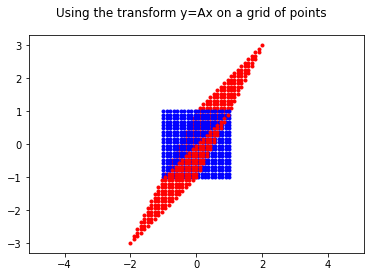

In [19]:
transform_unit_square(Ex)

It will be useful for us to see how a matrix transforms the unit circle (note that the origin always remain unchanged)

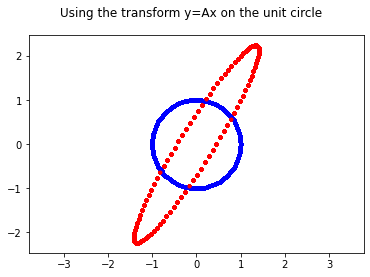

In [20]:
def transform_unit_circle(A):
    nrp=100
    t = np.linspace(0,np.pi*2,nrp)



    p = np.linspace(-1.0,1.0,nrp)
    for i in range(100):
        x=[np.cos(t),np.sin(t)]
        y=np.dot(A,x)
        plt.plot(x[0], x[1], '.b', y[0], y[1], '.r')
    
    plt.suptitle('Using the transform y=Ax on the unit circle')
    plt.axis('equal')
    plt.show()

transform_unit_circle(Ex)


What happens with the matrix [[1,1],[1,1]]?

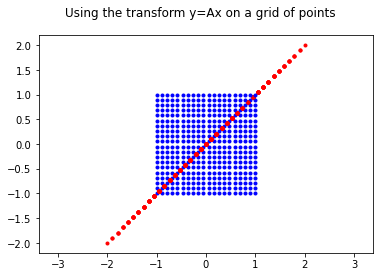

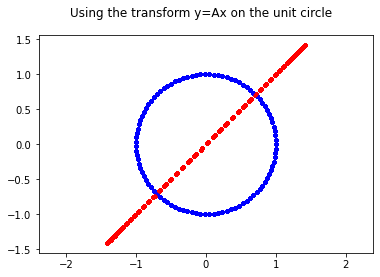

In [21]:
transform_unit_square([[1,1],[1,1]])
transform_unit_circle([[1,1],[1,1]])

### 3. Inverse Matrix

In [22]:
import scipy.linalg

An $(n,n)$ matrix A is _invertible_ if there is a matrix B such that $A \cdot B = I$, where $I$ is the identity matrix. B is the _inverse matrix_ of $A$. 

**For linear transformations (you guessed it), inverse matrices represent the linear transformation that gives back the original plane.**

In [23]:
A=np.array([1,1,1,0,1,1,1,2,1]).reshape((3,3))
B=sp.linalg.inv(A)
print (B)

[[ 1. -1.  0.]
 [-1.  0.  1.]
 [ 1.  1. -1.]]


In [24]:
print (np.dot(A,B))

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [25]:
print (np.dot(B,A))

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


Find the inverse of some matrix, plot the way each of them modifies the unit circle:

In [26]:
A=np.array([2,-2,-1,3]).reshape((2,2))
Inv=sp.linalg.inv(A)
print(Inv)

[[0.75 0.5 ]
 [0.25 0.5 ]]


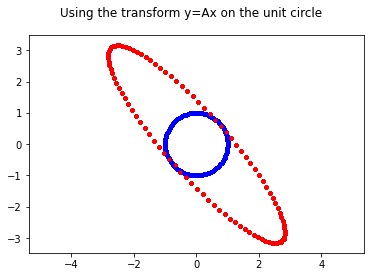

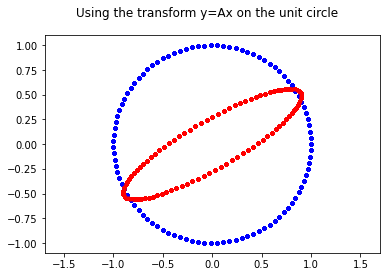

In [27]:
transform_unit_circle(A)

transform_unit_circle(Inv)



### 4. Norms

The _norm_ of a vector $\lVert x \rVert$ is a measure of its "length". The _Euclidean_ or $l_2$ norm is:

$ \lVert x \rVert _2 = \sqrt{\sum_{i=1}^n{x_i^2}}$

... which is equivalent to $\sqrt{x^Tx}$.

Other examples of norms: 

$ \lVert x \rVert _1 = \sum_{i=1}^n{|x_i|}$

$ \lVert x \rVert _\infty = \max_{i}|x_i|$

Let us calculate them using scipy.linalg.norm function:

In [28]:
v=np.array([1,2,3,5,5])

print(sp.linalg.norm(v,2))
print(sp.linalg.norm(v,1))
print(sp.linalg.norm(v,np.inf))




8.0
16.0
5.0



### 5. Some Basic Matrix Identities

In [29]:
A=np.array([1,1,1,0,1,1,1,2,1]).reshape((3,3))
B=np.array([1,0,1,0,1,1,0,1,2]).reshape((3,3))
print (A)
print (B)


[[1 1 1]
 [0 1 1]
 [1 2 1]]
[[1 0 1]
 [0 1 1]
 [0 1 2]]


*Property 1:*  

$A\cdot A^{-1} = A^{-1}\cdot A = I$ **[2]**.

That is, _if we multiply a matrix by its inverse, we get the identity matrix (no matter the product order)_

In [30]:
print (np.dot(A,sp.linalg.inv(A)))

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [31]:
print (np.dot(sp.linalg.inv(A),A))

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


_Property 2_: $(AB)^{-1} = B^{-1}A^{-1}$ **[3]**. Proof: just left multiply with $AB$ both sides and get $I$

In [32]:
print (sp.linalg.inv(np.dot(A,B)))
print (np.dot(sp.linalg.inv(B),sp.linalg.inv(A)))

[[-1. -2.  2.]
 [-3. -1.  3.]
 [ 2.  1. -2.]]
[[-1. -2.  2.]
 [-3. -1.  3.]
 [ 2.  1. -2.]]


_Property 3_: $(A^T)^{-1}= (A^{-1})^T$ **[4]**. _The inverse of the trasposed is the trasposed inverted_ 

Proof: using Property 1 and transposing, we get $(AA^{-1})^{T}=I$. Applying [1], we get $(A^{-1})^T A^T=I$. Multiplying both sides to the right by  $(A^T)^{-1}$, we get the result we were searching for. Let's verify it using our examples:

In [33]:
print (sp.linalg.inv(np.transpose(A)))
print (np.transpose(np.linalg.inv(A)))

[[ 1. -1.  1.]
 [-1.  0.  1.]
 [ 0.  1. -1.]]
[[ 1. -1.  1.]
 [-1.  0.  1.]
 [ 0.  1. -1.]]


### Rank and linear independece

A set of vectors is _linearly independent_ if none of the vectors can be expressed as a lineal combination of the reminder (or, equivalently, if $\sum_{n} \alpha_{n}a_n = 0$ only if all $\alpha_{n}$). The _rank_ of a matrix is the maximum number of linearly independent rows (or, equivalently, columns). The rank measures how much "information" the matrix stores. If the number of columns is greater than the rank, we can somehow "compress" the matrix. 

### 6. Traces and determinants.

The _trace_ of a matrix is defined as the sum of the elements of its diagonal. 

In [34]:
print (A)
print (np.trace(A))

[[1 1 1]
 [0 1 1]
 [1 2 1]]
3


We have $Tr(AB)=Tr(BA)$ **[5]**

In [35]:
print (np.trace(np.dot(A,B)),"=",np.trace(np.dot(B,A)))

8 = 8


The determinant $|A|$ of a $N\times N$ matrix is defined by:

$|A| = \sum (\pm 1)A_{1i_1}A_{2i_2}\ldots A_{Ni_N}$, where "the sum is taken over all products consisting of precisely one element from each row and one element from each column, with a coefficient $+1$ or $-1$ according to whether the permutation $i_1i_2\ldots i_N$ is even or odd, respectively".  From Wikipedia: _"A geometric interpretation can be given to the value of the determinant of a square matrix with real entries: **the absolute value of the determinant gives the scale factor by which area or volume (or a higher-dimensional analogue) is multiplied under the associated linear transformation, while its sign indicates whether the transformation preserves orientation**. Thus a 2 × 2 matrix with determinant −2, when applied to a region of the plane with finite area, will transform that region into one with twice the area, while reversing its orientation"_



Property: $|AB| = |A||B|$ **[6]** (**The determinant of a product of matrices is the product of their determinants**)

In [36]:
print (np.linalg.det(np.dot(A,B)))
print (np.linalg.det(A), np.linalg.det(B))

-1.0
-1.0 1.0


Determinant of the inverse matrix: $|A^{-1}| = \frac{1}{|A|}$  **[7]**(**The determinant of the inverse of a matrix is the real inverse of its determinant**). Note that this implies that a matrix is invertible if it has a non-zero determinant!

In [37]:
C=np.array([2,-2,-1,3]).reshape((2,2))
print (np.linalg.det(np.linalg.inv(C)))
print (np.linalg.det(C))

0.25000000000000006
4.0


### 7. Eigenvector Equation

If A is of size $M \times M$, then the eigenvector equation is $Au_i = \lambda _i u_i$ ($u_i$ is an _eigenvector_ and $\lambda_i$ is its corresponding _eigenvalue_). If you have a vector $v$, and a matrix $A$, the dot product $Av$ produces another vector $v'$. If $v$ and $v'$ are parallel, then $v$ is an eigenvector of $A$, and the scale factor between $v$ and $v'$ is its eigenvalue. In the following picture (taken from the beautiful Wikipedia page for Eigenvalues and Eigenvectors), the transformation produced by the matrix [[2,1],[1,2]] is shown; blue and pink vectors are eigenvectors:

In [38]:
from IPython.display import Image
Image(url='http://upload.wikimedia.org/wikipedia/commons/a/ad/Eigenvectors-extended.gif')

**The eigenvalue equation for $A$ is $(A -\lambda I)v =0$**. This equation has a non-zero solution iif its determinant $|A - \lambda I|=0$; its roots are precisely the eigenvalues of A.

Suppose we have the following A (Wikipedia, again!):

In [39]:
A=np.array([2,0,0,0,3,4,0,4,9]).reshape(3,3)
print (A)

[[2 0 0]
 [0 3 4]
 [0 4 9]]


Its rank is the number of nonzero eigenvalues:

In [40]:
print (np.linalg.matrix_rank(A))

3


Find the eigenvalues and eigenvectors (note that any non-zero multiple of an eigenvector is also an eigenvector)

In [41]:
print (np.linalg.eig(A)[0]) #Eigenvalues
print (np.linalg.eig(A)[1]) #Eigenvectors are columns!


[11.  1.  2.]
[[ 0.          0.          1.        ]
 [ 0.4472136   0.89442719  0.        ]
 [ 0.89442719 -0.4472136   0.        ]]


**The eigenvectors of a matrix can be choosen to be orthonormal** (i.e. $u_i^Tu_j = I_{ij}$, and, by normalizing, can be set to unit length)

In [42]:
ev=np.linalg.eig(A)[1]
print (ev)
print (ev[:,0])
print (np.dot(ev[:,0],ev[:,1]))
print (np.dot(ev[:,1],ev[:,2]))
print (np.dot(ev[:,1],ev[:,1]))
print (np.linalg.norm(ev[:,1]))

[[ 0.          0.          1.        ]
 [ 0.4472136   0.89442719  0.        ]
 [ 0.89442719 -0.4472136   0.        ]]
[0.         0.4472136  0.89442719]
0.0
0.0
0.9999999999999999
0.9999999999999999


Symmetric matrices have the property that $A^T=A$. Matrices where $A=-A^T$ are *antisymmetric*. 
The inverse of a symmetric matrix is also symmetric (demonstrate). **For symmetric matrices, the eigenvalues are real**. See, for example:

In [43]:
S=np.array([3,1,1,1,5,0,1,0,1]).reshape(3,3)
print (S)
evS=np.linalg.eigvals(A)
print (evS)

[[3 1 1]
 [1 5 0]
 [1 0 1]]
[11.  1.  2.]


**Any M-dimensional vector can be expressed as a linear combination of the eigenvectors.**

Let's define an $M \times M$ matriz **U**, where the eigenvectors $u_i$ are the columns. This matrix satisfies $U^TU=I$. This matrix is _orthogonal_. The eigenvector equation can be defined now as: $AU = U\Lambda$ **[8]**, where $\Lambda$ is a diagonal matrix whose elements are the eigenvalues. It can be shown that multiplication by $U$ can be interpreted as a rigid rotation or a reflection of the coordinate system.

In [44]:
# Show the eigenvectors of A
print (ev)


[[ 0.          0.          1.        ]
 [ 0.4472136   0.89442719  0.        ]
 [ 0.89442719 -0.4472136   0.        ]]


In [45]:
print(A)

[[2 0 0]
 [0 3 4]
 [0 4 9]]


In [46]:
# Verify that AU = U\Lambda
print (np.dot(A,ev))

lmbda= np.diag(np.linalg.eigvals(A))
print (np.dot(ev,lmbda))

[[ 0.          0.          2.        ]
 [ 4.91934955  0.89442719  0.        ]
 [ 9.8386991  -0.4472136   0.        ]]
[[ 0.          0.          2.        ]
 [ 4.91934955  0.89442719  0.        ]
 [ 9.8386991  -0.4472136   0.        ]]


From $AU = U\Lambda$, it follows $U^TAU = \Lambda$  ($A$ is _diagonalized_ by $U$). From this, left multiplying by $U$, right multiplying by $U^T$, we get 

$A = U \Lambda U^T$, or $A = \sum_{i=1}^M {\lambda_i} u_i u_i^T$ **[9]**



Let us draw the linear transformation for each matrix in the A descomposition: since $U$ is orthogonal, it represents a rotation;after that, multiplying by $\lambda$ scales the axis using the eigenvalues; finally $U^T$ rotates the axis back...

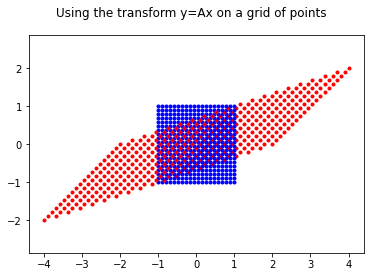

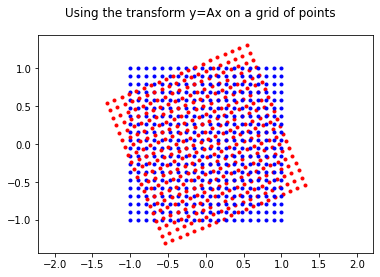

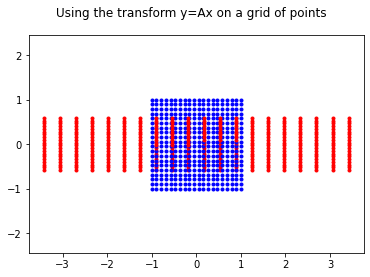

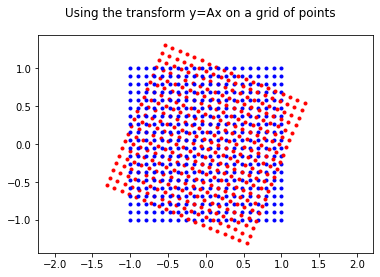

In [47]:
Ex=np.array([3,1,1,1]).reshape(2,2)
# Find eigenvectors
U=np.linalg.eig(Ex)[1]
lmbda1= np.diag(np.linalg.eigvals(Ex))

transform_unit_square(Ex)
transform_unit_square(U)
transform_unit_square(lmbda1)
transform_unit_square(np.transpose(U))





Taking inverse and given $U^{-1} = U^T$ (since U is orthogonal), we have: 

$A^{-1} = U \Lambda^{-1} U^T$, or 

$A^{-1} = \sum_{i=1}^M \frac{1}{\lambda_i} u_i u_i^T$ **[10]**

In [48]:
# Calculate the inverse of A
print (ev.dot(np.linalg.inv(lmbda).dot(np.transpose(ev))))

print (np.linalg.inv(A))


[[ 0.5         0.          0.        ]
 [ 0.          0.81818182 -0.36363636]
 [ 0.         -0.36363636  0.27272727]]
[[ 0.5         0.          0.        ]
 [ 0.          0.81818182 -0.36363636]
 [-0.         -0.36363636  0.27272727]]


We can also show that **the determinant of a matrix is the products of its eigenvalues**:

$|A| = \prod_{i=1}^{M}\lambda_i$ **[11]**

And that **the trace of a matrix is the sum of its eigenvalues**

$Tr(A) = \sum_{i=1}^{M}\lambda_i$ **[12]**



In [49]:
print (str(np.prod(np.linalg.eigvals(A))) + ','+ str(np.linalg.det(A)))

print (str(np.sum(np.linalg.eigvals(A))) + ','+ str(np.trace(A)))

22.0,21.999999999999996
14.0,14


A symmetric matrix A is _positive (semi)definite_ if, for all w, $w^T A w >(\geq) 0$ ($w^T A w $ is called the _quadratic form_). A positive definite matrix has all positive eigenvalues. The intution behind definite matrices is that they are a multi-dimensional version of a positive scalar.  When you multiply a vector with a matrix, you multiply the vector by different factors in the different space directions. If the matrix is positive definite, this is all true, but just like with a positive scalar, the new vector and the old vector go "in the same direction" in the sense that their angle is less than 90 degrees. More precisely: the old and the new have a positive inner product. (Taken from https://www.quora.com/What-is-a-positive-definite-matrix-in-laymans-terms).

One important property of positive definite and negative definite matrices is that they are always full rank, and hence, invertibles.

Given $A \in {\rm I\!R}^{n \times n}$ there is a special matrix $G =A^TA$, called the _Gram Matrix_, always positive semidefinite, and if $m \geq n$, $G$ is positive definite.



### 9. Matrix Derivatives

Given a function $f$ mapping from $m$-by-$n$ matrices to real numbers, we can define the _gradient_ $\nabla_A f(A)$ as an $m$-by-$n$ matrix whose $(i,j)$ element is $\partial f/\partial A_{ij}$. Some properties of gradients (see Bishop's appendix for details), are the following:

- $\nabla_{A}Tr(AB)=B^T$ **[11]**
- $\nabla_{A}Tr(A^TB)=B$ **[12]**
- $\nabla_{A}Tr(A)=I$ **[13]**
- $ \nabla_{A}Tr(ABA^T)=A(B+B^T)$**[14]**

And the beautiful

- $\nabla_{A}\ln|A|=(A^{-1})^T$**[15]**

Yet another two properties of gradients (from Andrew Ng's course notes, see next section):

- $\nabla_{A^T} f(A)= (\nabla_{A} f(A))^T$ **[16]**
- $\nabla_{A} Tr(ABA^TC) = CAB + C^TAB^T$ **[17]**

### 10. Matrices for Machine Learning

It is difficult to find a machine learning method that does _not_ use matrices. From linear regression to deep neural networks, going through Principal Component Analysis, things are much easier if we use matrices and vectors. Just as an example, let's show how to find a closed-form solution for the problem of linear regression, following exactly the [notes](http://cs229.stanford.edu/notes/cs229-notes1.pdf) of Mr. @andrewyng. In the next section, we will see how to implement everything using Python.

First, let's define the problem of linear regression: we have a number of input _features_ from $\mathbb{R}^n$, noted as $x$, and an associated _target value_ $y$ in $\mathbb{R}$. Our _hypothesis_ is that, given $x$, $h(x) = \sum_{i=0}^{i=n} \theta_i x_i$ (assuming that $x_0=1$), or, using matrix notation (see how easier it looks):

$h(x)=\theta^T x$



(Note that, by convention, an instance from $\mathbb{R}^n$ is considered a column vector). What we want to do is to find $\theta^T$, given a training set (i.e. instances from $\mathbb{R}^n$ and their associated target value). The cost function we want to minimize wrt $\theta$ is the following:

$J(\theta) = \frac{1}{2}\sum_{i=1}^{i=m} (h_\theta(x^{(i)})- y^{(i)})^2$

where $x^{(i)}$ denotes the i-th instance, and $y^{(i)}$ its value. Note we are squaring the difference to take into account only the absolute value of the differences. 

This method is called _ordinary least squares_.


A typical way for minimizing $J$ is using some numerical method, i.e. _gradient descent_, which allows to minimize any convex function of multiple variables. For ordinary least squares, however, there is a _closed form_ solution, which we will show. The use of matrix notation will make things much easier than if we had to use index notation. 

First, let's rewrite J using matrix notation.

$J(\theta) = \frac{1}{2}(X\theta - y)^T(X\theta - y)$

where $X$ is the _design matrix_ that includes the training instances input values as rows, and $y$ is a column matrix including the corresponding target values (you can use index notation to check the equivalence, keeping in mind that $zz^T$ equals the sum of the squared elements of $z$!)




From now on, things are easy (especially if you compare to using index notation). First, use [1]:

$$
\nabla_\theta J(\theta) =\nabla_\theta\frac{1}{2}(X\theta - y)^T(X\theta - y) = \nabla_\theta\frac{1}{2} (\theta^TX^TX\theta - \theta^TX^Ty - y^TX\theta+ yy^T) 
$$


Now, since $J(\theta)$ is a real number, its trace is the same number

$$
\nabla_\theta J(\theta) =\nabla_\theta\mathrm{Tr}(\frac{1}{2} (\theta^TX^TX\theta - \theta^TX^Ty - y^TX\theta+ yy^T))
$$




Now, since $\mathrm{Tr}(A) = \mathrm{Tr}(A^T)$:

$$
\nabla_\theta J(\theta) = \frac{1}{2} \nabla_\theta(\mathrm{Tr}(\theta^TX^TX\theta) - 2 \mathrm{Tr}(\theta^TX^Ty) + \mathrm{Tr}(yy^T))
$$

Applying [16] and [17] we get:

$$
\nabla_\theta J(\theta) = \frac{1}{2} (X^TX\theta + X^TX\theta -2X^Ty )= X^TX\theta -X^Ty
$$

To minimize $J$, we just equals its gradient to 0, obtaining,

$$
X^TX\theta = X^Ty
$$

and, from here, we get a closed formula for our parameter vector $\theta$:

$$
\theta = (X^TX)^{-1}X^Ty
$$

### 11. Linear regression with Python

Suppose we have target class _y_ (say, a house's price), dependent on 3 real-valued attributes $x_1,x_2,x_3$ (for example, number of rooms, minimum tax and house age). Suppose that we have the attributes and prices for 10 houses.  _If we assume_ that the price of a house is a _linear combination_ of the three attributes,  $y = \theta_0 + \theta_1x_1 + \theta_2x_2 + \theta_3x_3$, and that we should find the $\theta$ values. Now, we can define $X$ (the design matrix) and $y$

In [50]:
X=np.array([
[1.0,1.0,1.9,1.1],
[1.0,0.1,1.0,1.0],
[1.0,1.1,1.0,0.1],
[1.0,1.1,1.1,0.9],
[1.0,2.1,1.2,1.0],
[1.0,0.9,1.0,3.0],
[1.0,3.1,0.9,3.0],
[1.0,1.9,0.9,2.1],
[1.0,0.0,-0.1,1.1],
[1.0,1.0,1.0,0.1]
])
print (X)


[[ 1.   1.   1.9  1.1]
 [ 1.   0.1  1.   1. ]
 [ 1.   1.1  1.   0.1]
 [ 1.   1.1  1.1  0.9]
 [ 1.   2.1  1.2  1. ]
 [ 1.   0.9  1.   3. ]
 [ 1.   3.1  0.9  3. ]
 [ 1.   1.9  0.9  2.1]
 [ 1.   0.  -0.1  1.1]
 [ 1.   1.   1.   0.1]]


In [51]:
y=np.array([5.0,2.0,4.1,3.0,5.0,1.0,2.8,2.6,-0.4,4.1])
print (y)


[ 5.   2.   4.1  3.   5.   1.   2.8  2.6 -0.4  4.1]


Note that we added a left column to the matrix, each cell valued with 1. This is to add a new $x_0$ attribute, as before. We can now calculate the parameters for the hyperplane that minimizes the sum of squares using the previous formula ($\theta = (X^TX)^{-1}X^Ty$):

In [52]:
theta=np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(X),X)),np.transpose(X)),y)
print (theta)

[ 0.87782702  1.051817    2.18366554 -1.05476926]


Let's verify that our just found parameter vector, dot the attributes of each instance, gives us (approximately) the corresponding $y$ cell. We can do this for every training examples, just calculating $X\theta$

In [53]:
print (np.dot(X,theta))


[ 4.91836235  2.111905    4.11301432  3.48756547  4.6522721   0.84382008
  2.93945092  2.62656285 -0.50078572  4.00783262]


Of course, a) ordinary least squares is a very simple method for regression and b) every statistical/machine learning package includes much more efficient ways of finding $\theta$. For example, using the linalg library:

In [54]:
print (np.linalg.lstsq(X, y)[0])

[ 0.87782702  1.051817    2.18366554 -1.05476926]


<ipython-input-54-605ee9bfeafe>:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  print (np.linalg.lstsq(X, y)[0])


### 12. Principal Component Analysis

To show how operating with matrices looks in numpy, I've sligthly adapted a tutorial on PCA with Python to a very simple example. The IPython notebook is [here](https://github.com/gmonce/datascience/blob/master/src/Just%20some%20notes%20on%20PCA%20in%20Python.ipynb). 

### 13. References

[Linear Algebra Review and Reference](http://cs229.stanford.edu/section/cs229-linalg.pdf) (Zico Kolter)

[A Beginner’s Guide to Eigenvectors, PCA, Covariance and Entropy](http://deeplearning4j.org/eigenvector)

[A tutorial on PCA](http://www.cs.otago.ac.nz/cosc453/student_tutorials/principal_components.pdf)(Lindsay Smiths)

[PCA Step by step in Python](http://sebastianraschka.com/Articles/2014_pca_step_by_step.html) (Sebastian Raschka)

[CS229 Notes - 1](http://cs229.stanford.edu/notes/cs229-notes1.pdf) (Andrew Ng)




### 14. Addendum

A geometric interpretation in four intuitive steps, taken from StackExchange: http://math.stackexchange.com/q/636198

**The Determinant is the Volume Change Factor**

Think of the matrix as a geometric transformation, mapping points (column vectors) to points: x↦Mx. The determinant det(M)gives the factor by which volumes change under this mapping.

For example, in the question you define the determinant as the volume of the parallelepiped whose edges are given by the matrix columns. This is exactly what the unit cube maps to, so again, the determinant is the factor by which the volume changes.

**A Matrix Maps a Sphere to an Ellipsoid**

Being a linear transformation, a matrix maps a sphere to an ellipsoid. The singular value decomposition makes this especially clear.

If you consider the principal axes of the ellipsoid (and their preimage in the sphere), the singular value decomposition expresses the matrix as a product of (1) a rotation that aligns the principal axes with the coordinate axes, (2) scalings in the coordinate axis directions to obtain the ellipsoidal shape, and (3) another rotation into the final position.

**The Transpose Inverts the Rotation but Keeps the Scaling**

The transpose of the matrix is very closely related, since the transpose of a product is the reversed product of the transposes, and the transpose of a rotation is its inverse. In this case, we see that the transpose is given by the inverse of rotation (3), the same scaling (2), and finally the inverse of rotation (1).

(This is almost the same as the inverse of the matrix, except the inverse naturally uses the inverse of the original scaling (2).)

**The Transpose has the Same Determinant**

Anyway, the rotations don't change the volume -- only the scaling step (2) changes the volume. Since this step is exactly the same for $M$ and $M^⊤$, the determinants are the same.